In [1]:
!pip install wordcloud
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/daniel/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/daniel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [2]:
# importing all necessery modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
#from statsmodels.tsa import ExponentialSmoothing
#from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
#loads the business dataset which contains details about each restaurant
location = "dataset/business.csv"
dfbs = pd.read_csv(location, low_memory=False)

In [4]:
#remove innecesary columns
dfbs = dfbs[[
    
       #'address', 'attributes', 'attributes_AcceptsInsurance',
    'attributes_AgesAllowed', 
    'attributes_Alcohol', 
    #'attributes_Ambience',
        'attributes_BYOB', 'attributes_BYOBCorkage', 
    #'attributes_BestNights',
        'attributes_BikeParking', 'attributes_BusinessAcceptsBitcoin',
        'attributes_BusinessAcceptsCreditCards', 
    #'attributes_BusinessParking',
     #   'attributes_ByAppointmentOnly', 'attributes_Caters',
        'attributes_CoatCheck', 'attributes_Corkage',
      #  'attributes_DietaryRestrictions', 'attributes_DogsAllowed',
        'attributes_DriveThru', 'attributes_GoodForDancing',
        'attributes_GoodForKids', 
    #'attributes_GoodForMeal',
    #    'attributes_HairSpecializesIn', 
    'attributes_HappyHour',
        'attributes_HasTV', 
    #'attributes_Music', 
    'attributes_NoiseLevel',
        'attributes_Open24Hours', 'attributes_OutdoorSeating',
        'attributes_RestaurantsAttire', 'attributes_RestaurantsCounterService',
        'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups',
        'attributes_RestaurantsPriceRange2',
        'attributes_RestaurantsReservations',
        'attributes_RestaurantsTableService', 'attributes_RestaurantsTakeOut',
        'attributes_Smoking', 'attributes_WheelchairAccessible',
        'attributes_WiFi', 
    'business_id', 
    'categories', 
    #'city', 'hours',
    #    'hours_Friday', 'hours_Monday', 'hours_Saturday', 'hours_Sunday',
    #    'hours_Thursday', 'hours_Tuesday', 'hours_Wednesday', 'is_open',
        'latitude', 'longitude', 
    #'name', 'postal_code', 
    'review_count', 
    #'stars',
        'state']]

In [5]:
"Business columns", dfbs.columns, dfbs.shape

('Business columns',
 Index(['attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
        'attributes_BYOBCorkage', 'attributes_BikeParking',
        'attributes_BusinessAcceptsBitcoin',
        'attributes_BusinessAcceptsCreditCards', 'attributes_CoatCheck',
        'attributes_Corkage', 'attributes_DriveThru',
        'attributes_GoodForDancing', 'attributes_GoodForKids',
        'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
        'attributes_Open24Hours', 'attributes_OutdoorSeating',
        'attributes_RestaurantsAttire', 'attributes_RestaurantsCounterService',
        'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups',
        'attributes_RestaurantsPriceRange2',
        'attributes_RestaurantsReservations',
        'attributes_RestaurantsTableService', 'attributes_RestaurantsTakeOut',
        'attributes_Smoking', 'attributes_WheelchairAccessible',
        'attributes_WiFi', 'business_id', 'categories', 'latitude', 'long

In [6]:
# creating a columns that contains whether the business is a restaurant
dfbs["Restaurant?"]= dfbs["categories"].str.find('Restaurant') 
dfbs["restaurant?"]= dfbs["categories"].str.find('restaurant') 

In [7]:
dfbs_restaurants = dfbs[(dfbs['Restaurant?'] > 0) | (dfbs['restaurant?'] > 0) ]

In [8]:
dfbs_restaurants.shape

(41435, 36)

In [9]:
dfbs_restaurants = dfbs_restaurants.drop(['Restaurant?', 'restaurant?'], axis=1)
dfbs_restaurants.columns

Index(['attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
       'attributes_BYOBCorkage', 'attributes_BikeParking',
       'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_CoatCheck',
       'attributes_Corkage', 'attributes_DriveThru',
       'attributes_GoodForDancing', 'attributes_GoodForKids',
       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups',
       'attributes_RestaurantsPriceRange2',
       'attributes_RestaurantsReservations',
       'attributes_RestaurantsTableService', 'attributes_RestaurantsTakeOut',
       'attributes_Smoking', 'attributes_WheelchairAccessible',
       'attributes_WiFi', 'business_id', 'categories', 'latitude', 'longitude',
       'review_count', 'stat

In [10]:
#load the datasets containing all the reviews per business 
location = "dataset/review.csv"
dfrv = pd.read_csv(location, low_memory=False)

In [11]:
"Review columns", dfrv.columns, dfrv.shape

('Review columns',
 Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
        'useful', 'user_id'],
       dtype='object'),
 (6685902, 9))

In [12]:
# the most important step, merges data from business with their reviews
dfbsrv_restaurants = pd.merge(dfbs_restaurants, dfrv, on='business_id')

In [13]:
dfbsrv_restaurants.shape

(3149598, 42)

In [14]:
dfbsrv_restaurants.columns

Index(['attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
       'attributes_BYOBCorkage', 'attributes_BikeParking',
       'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_CoatCheck',
       'attributes_Corkage', 'attributes_DriveThru',
       'attributes_GoodForDancing', 'attributes_GoodForKids',
       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups',
       'attributes_RestaurantsPriceRange2',
       'attributes_RestaurantsReservations',
       'attributes_RestaurantsTableService', 'attributes_RestaurantsTakeOut',
       'attributes_Smoking', 'attributes_WheelchairAccessible',
       'attributes_WiFi', 'business_id', 'categories', 'latitude', 'longitude',
       'review_count', 'stat

In [15]:
#location = "dfbsrv_restaurants.csv"
#dfbsrv_restaurants_load = pd.read_csv(location, low_memory=False)   #, encoding='latin1' 

In [16]:
#location = "dfx_restaurants.xlsx"
#df = pd.read_excel (location , sheet_name='Sheet_name_1')
#print (df)

In [17]:
#dfbsrv_restaurants = dfbsrv_restaurants_load

In [18]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

In [19]:
unique_col_values(dfbsrv_restaurants)

attributes_AgesAllowed | 5 | object
attributes_Alcohol | 8 | object
attributes_BYOB | 2 | object
attributes_BYOBCorkage | 8 | object
attributes_BikeParking | 4 | object
attributes_BusinessAcceptsBitcoin | 3 | object
attributes_BusinessAcceptsCreditCards | 4 | object
attributes_CoatCheck | 4 | object
attributes_Corkage | 3 | object
attributes_DriveThru | 4 | object
attributes_GoodForDancing | 4 | object
attributes_GoodForKids | 4 | object
attributes_HappyHour | 4 | object
attributes_HasTV | 4 | object
attributes_NoiseLevel | 10 | object
attributes_Open24Hours | 3 | object
attributes_OutdoorSeating | 4 | object
attributes_RestaurantsAttire | 8 | object
attributes_RestaurantsCounterService | 3 | object
attributes_RestaurantsDelivery | 4 | object
attributes_RestaurantsGoodForGroups | 4 | object
attributes_RestaurantsPriceRange2 | 6 | object
attributes_RestaurantsReservations | 4 | object
attributes_RestaurantsTableService | 4 | object
attributes_RestaurantsTakeOut | 4 | object
attributes_S

In [20]:
#unique_col_values(dfrv)

In [21]:
dfbsrv_restaurants['attributes_AgesAllowed'].unique(), dfbsrv_restaurants['attributes_Alcohol'].unique(), dfbsrv_restaurants['attributes_BYOB'].unique(), dfbsrv_restaurants['attributes_BusinessAcceptsCreditCards'].unique()

(array([nan, "u'21plus'", "u'allages'", "u'19plus'", "u'18plus'"],
       dtype=object),
 array(["u'full_bar'", "u'beer_and_wine'", "u'none'", nan, "'none'",
        "'beer_and_wine'", "'full_bar'", 'None'], dtype=object),
 array([nan, False], dtype=object),
 array([nan, 'True', 'False', 'None'], dtype=object))

In [22]:
dfbsrv_restaurants['review_count'].unique(), dfbsrv_restaurants['attributes_WiFi'].unique(), dfbsrv_restaurants['attributes_HappyHour'].unique(), dfbsrv_restaurants['attributes_RestaurantsPriceRange2'].unique()

(array([ 128,  170,   16, ..., 1076, 3300,  514]),
 array(["u'no'", nan, "u'free'", "'no'", "'free'", 'None', "'paid'",
        "u'paid'"], dtype=object),
 array([nan, 'False', 'True', 'None'], dtype=object),
 array(['2', '1', '3', nan, '4', 'None'], dtype=object))

In [23]:
dfbsrv_restaurants['attributes_CoatCheck'].unique(), dfbsrv_restaurants['attributes_Open24Hours'].unique(), dfbsrv_restaurants['attributes_HasTV'].unique(), dfbsrv_restaurants['attributes_NoiseLevel'].unique()
#,dfbs['attributes_Music'].unique()

(array([nan, 'False', 'True', 'None'], dtype=object),
 array([nan, False, True], dtype=object),
 array(['False', 'True', nan, 'None'], dtype=object),
 array(["u'loud'", "u'average'", nan, "'average'", "u'quiet'", "'quiet'",
        "u'very_loud'", "'loud'", "'very_loud'", 'None'], dtype=object))

In [24]:
dfbsrv_restaurants['attributes_GoodForKids'].unique()

array(['True', nan, 'False', 'None'], dtype=object)

In [25]:
dfbsrv_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149598 entries, 0 to 3149597
Data columns (total 42 columns):
attributes_AgesAllowed                   object
attributes_Alcohol                       object
attributes_BYOB                          object
attributes_BYOBCorkage                   object
attributes_BikeParking                   object
attributes_BusinessAcceptsBitcoin        object
attributes_BusinessAcceptsCreditCards    object
attributes_CoatCheck                     object
attributes_Corkage                       object
attributes_DriveThru                     object
attributes_GoodForDancing                object
attributes_GoodForKids                   object
attributes_HappyHour                     object
attributes_HasTV                         object
attributes_NoiseLevel                    object
attributes_Open24Hours                   object
attributes_OutdoorSeating                object
attributes_RestaurantsAttire             object
attributes_RestaurantsC

In [26]:
#["u'full_bar'", "u'beer_and_wine'", "u'none'", nan, "'none'",
#        "'beer_and_wine'", "'full_bar'", 'None']
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'full_bar'", 
                 value ="'full_bar'") 
#dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="'full_bar'", 
#                 value ="'full bar'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'beer_and_wine'", 
                 value ="'beer_and_wine'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'none'", 
                 value ='None') 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="'none'", 
                 value ='None') 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="'None'", 
                 value ='None') 

In [27]:
#"u'no'", nan, "u'free'", "'no'", "'free'", 'None', "'paid'",
#        "u'paid'"
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'no'", 
                 value ="'no'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'free'", 
                 value ="'free'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'paid'", 
                 value ="'paid'") 


In [28]:
#"u'loud'", "u'average'", nan, "'average'", "u'quiet'", "'quiet'",
     #   "u'very_loud'", "'loud'", "'very_loud'", 'None'

dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'loud'", 
                 value ="'loud'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'average'", 
                 value ="'average'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'quiet'", 
                 value ="'quiet'") 
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace ="u'very_loud'", 
                 value ="'very_loud'") 

In [29]:
dfbsrv_restaurants = dfbsrv_restaurants.replace(to_replace = ["u'21plus'","u'19plus'", "u'18plus'"], 
                 value ="'18plus'") 

In [30]:
def bar_plot_atrribute(attribute_to_chart):
    #attribute_to_chart = 'attributes_WiFi'
    restaurant_count = dfbsrv_restaurants[attribute_to_chart].value_counts()

    sns.set(style="darkgrid")
    
    plt.figure(figsize = (22, 5), facecolor = None) 
    plt.title('Frequency Distribution of ' + attribute_to_chart)
    plt.ylabel('Number of reviews', fontsize=12)
    plt.xlabel(attribute_to_chart, fontsize=12)
    ax = sns.barplot(restaurant_count.index, restaurant_count.values, alpha=0.9)
    #plt.figure(figsize = (22, 8), facecolor = None) 
    #ax = sns.barplot(x = 'index', y = 'frequency',data = top.reset_index())
    #plt.show()


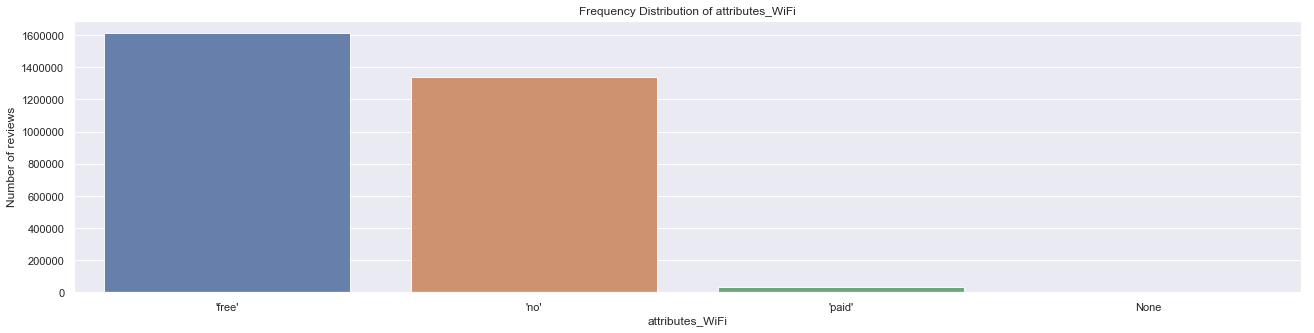

In [31]:
bar_plot_atrribute('attributes_WiFi')

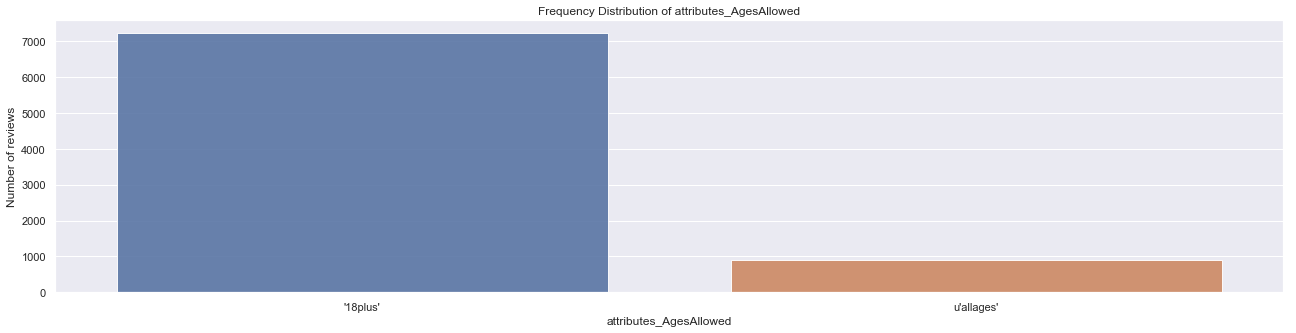

In [32]:
bar_plot_atrribute('attributes_AgesAllowed')

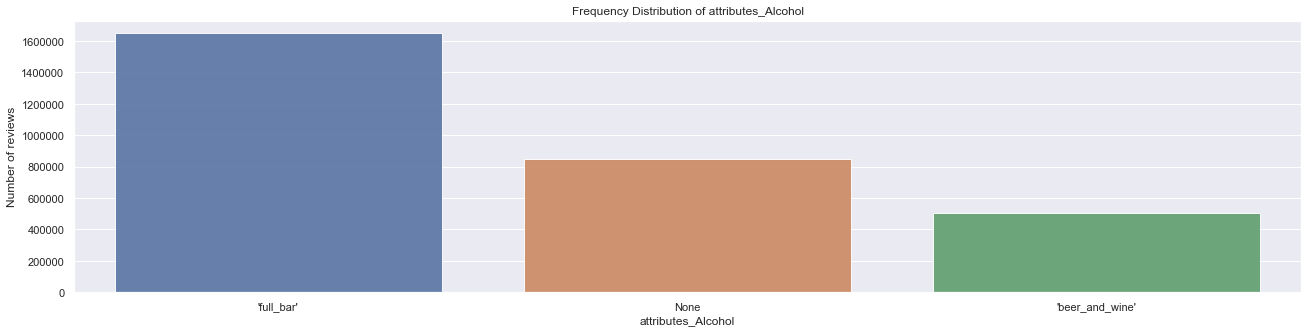

In [33]:
bar_plot_atrribute('attributes_Alcohol')

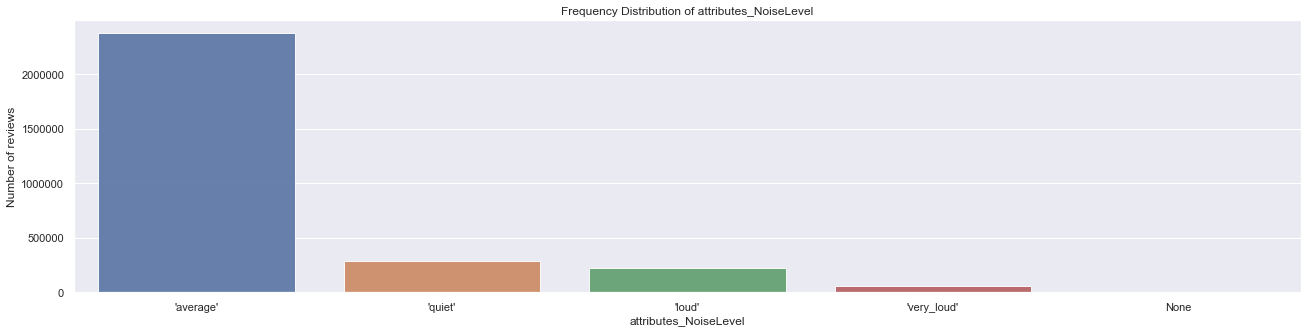

In [34]:
bar_plot_atrribute('attributes_NoiseLevel')

In [35]:
dfbsrv_restaurants.groupby(['state']).size()

state
AB       46003
AL           3
AR           7
AZ      887835
CON          3
IL       22180
NC      208272
NE           8
NM          14
NV     1082553
NY          91
OH      169787
ON      407121
PA      150098
QC       93632
SC       11024
VT           5
WA           3
WI       70948
XGM          3
XWY          8
dtype: int64

In [36]:
#dfbsrv_restaurants = dfbsrv_restaurants[dfbsrv_restaurants['state'] == 'IL' ]
#dfbsrv_restaurants.groupby(['state']).size()

In [37]:
#dfbsrv_restaurants.shape

In [38]:
dfbsrv_restaurants.dropna()

,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BYOBCorkage,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_CoatCheck,attributes_Corkage,attributes_DriveThru,...,review_count,state,cool,date,funny,review_id,stars,text,useful,user_id


In [39]:
def cloudwordgraph(dataframe):
  # Python program to generate WordCloud 
  
    # Reads 'Youtube04-Eminem.csv' file  
    df = dataframe  #['text']  #pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
    comment_words = ' '
    stopwords = set(STOPWORDS) 
  
    # iterate through the csv file 
    for val in df.text: 
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
          
        for words in tokens: 
            comment_words = comment_words + words + ' '
  
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

In [40]:
#sns.lmplot(x='latitude', y='longitude', data=dfbsrv, 
#           fit_reg=False, #remove regression line
#           hue='stars', col="stars",
#           height=6, aspect=.4, x_jitter=.1)   #color by evolution stage

In [41]:
dfbsrv_restaurants.shape

(3149598, 42)

In [42]:
#dfbsrv_restaurants['categories'].unique()

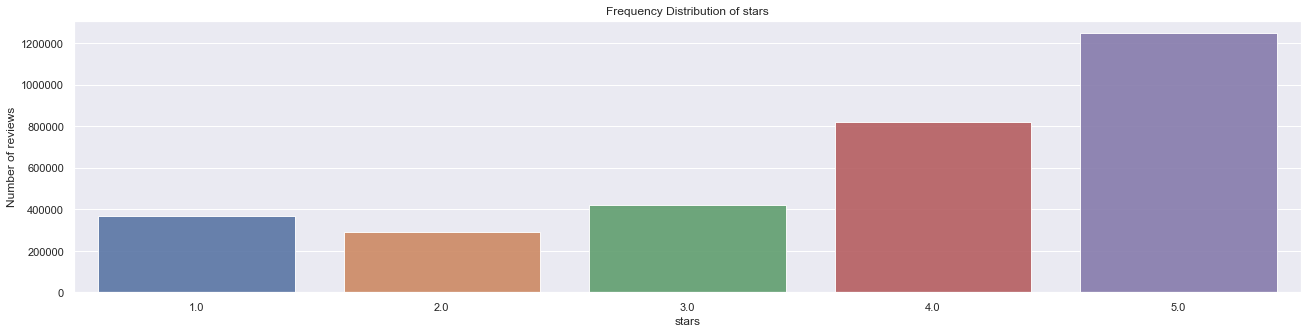

In [43]:
bar_plot_atrribute('stars')

# Word Cloud for stars = 1 & stars = 5

In [44]:
#cloudwordgraph(dfbsrv_restaurants[(dfbsrv_restaurants['stars'] == 1)])

In [45]:
#cloudwordgraph(dfbsrv_restaurants[(dfbsrv_restaurants['stars'] == 5)])

# Manipulate text data

In [46]:
dfbsrv_restaurants['polarity'] = dfbsrv_restaurants['text'].map(lambda text: TextBlob(text).sentiment.polarity)
dfbsrv_restaurants['review_len'] = dfbsrv_restaurants['text'].astype(str).apply(len)
dfbsrv_restaurants['word_count'] = dfbsrv_restaurants['text'].apply(lambda x: len(str(x).split()))

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [ ]:
#Plot polarity vs stars from 1 to 5
plt.figure(figsize=(10,6))
x1 = dfbsrv_restaurants[dfbsrv_restaurants['stars'] == 1]
x2 = dfbsrv_restaurants[dfbsrv_restaurants['stars'] == 2]
x3 = dfbsrv_restaurants[dfbsrv_restaurants['stars'] == 3]
x4 = dfbsrv_restaurants[dfbsrv_restaurants['stars'] == 4]
x5 = dfbsrv_restaurants[dfbsrv_restaurants['stars'] == 5]

x = pd.Series(x1['polarity'], name="polarity")
ax = sns.distplot(x, label='1 star', kde = False)

x = pd.Series(x2['polarity'], name="polarity")
bx = sns.distplot(x, kde = False)

x = pd.Series(x3['polarity'], name="polarity")
cx = sns.distplot(x, kde = False)

x = pd.Series(x4['polarity'], name="polarity")
dx = sns.distplot(x, kde = False)

x = pd.Series(x5['polarity'], name="polarity")
dx = sns.distplot(x, label='5 stars' , kde = False)


plt.legend()

In [ ]:
print('5 random reviews with the LOWEST positive sentiment polarity: \n')
cl = dfbsrv_restaurants.loc[dfbsrv_restaurants.polarity < -0.9, ['polarity','text']].sample(5).values
#print(df.polarity, )
#print(cl)
for c in cl:
    print( c[0], c[1])

In [ ]:
print('5 random reviews with the HIGHEST positive sentiment polarity: \n')
cl = dfbsrv_restaurants.loc[dfbsrv_restaurants.polarity > 0.9, ['polarity','text']].sample(5).values
#print(df.polarity, )
#print(cl)
for c in cl:
    print( c[0], c[1])

In [ ]:
plt.figure(figsize=(22,10))
sns.boxplot(x='stars', y='polarity', data=dfbsrv_restaurants)
plt.show();

In [ ]:
#Stars = 1, Polarity Negative
cloudwordgraph(dfbsrv_restaurants[(dfbsrv_restaurants['stars'] == 1) & (dfbsrv_restaurants['polarity'] < -0.8)])

In [ ]:
#Stars = 1, Polarity Positive
cloudwordgraph(dfbsrv_restaurants[(dfbsrv_restaurants['stars'] == 1) & (dfbsrv_restaurants['polarity'] > 0.8)])

In [ ]:
#Stars = 5, Polarity Positive
cloudwordgraph(dfbsrv_restaurants[(dfbsrv_restaurants['stars'] == 5) & (dfbsrv_restaurants['polarity'] > 0.8)])

In [ ]:
#Stars = 5, Polarity Negative
cloudwordgraph(dfbsrv_restaurants[(dfbsrv_restaurants['stars'] == 5) & (dfbsrv_restaurants['polarity'] < -0.5)])

## Removal of Stop Words
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [ ]:
dfbsrv_restaurants['text lower'] = dfbsrv_restaurants['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfbsrv_restaurants['text lower'] = dfbsrv_restaurants['text'].str.replace('[^\w\s]','')


dfbsrv_restaurants['text lower'].head()

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

In [ ]:
stop = stopwords.words('english')
dfbsrv_restaurants['text lower stopwords'] = dfbsrv_restaurants['text lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfbsrv_restaurants['text lower stopwords'].head()

In [ ]:
#freq = pd.Series(' '.join(dfbsrv_restaurants['text']).split()).value_counts()[:10]
#freq

In [ ]:
#freq = pd.Series(' '.join(dfbsrv_restaurants['text']).split()).value_counts()[-10:]
#freq

## 2.6 Spelling correction

We’ve all seen reviews with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

In [ ]:
from textblob import Word
dfbsrv_restaurants['text_lemm'] = dfbsrv_restaurants['text lower stopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfbsrv_restaurants['text_lemm'].head()

# 3.1 N-grams

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.



In [ ]:
!pip install -U textblob

In [ ]:
!python -m textblob.download_corpora

In [ ]:
#TextBlob(dfbsrv_restaurants['text_lemm'][0]).ngrams(2)

#blob = TextBlob(dfbsrv_restaurants['text_lemm'][0])
#blob.ngrams(n=3)

In [ ]:
#plt.figure(figsize=(10,6))
#sns.boxplot(x='attributes_NoiseLevel', y='stars', data=dfbsrv_restaurants)
#plt.show();

In [ ]:
#plt.figure(figsize=(10,6))
#sns.boxplot(x='attributes_WiFi', y='stars', data=dfbsrv_restaurants)
#plt.show();

# N-grams

In [ ]:
#import re

#def generate_ngrams(s, n):
    # Convert to lowercases
#    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
#    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
#    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
#    ngrams = zip(*[token[i:] for i in range(n)])
#    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
#import re
#from nltk.util import ngrams

#s = s.lower()
#s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
#tokens = [token for token in s.split(" ") if token != ""]
#output = list(ngrams(tokens, 5))

In [ ]:
#TextBlob(dfbsrv_restaurants['text']).ngrams(2)

In [ ]:
#dfbsrv_restaurants.info()

# N-Gram (2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#sparse_matrix = word_vectorizer.fit_transform(dfbsrv_restaurants['text_lemm'])
#frequencies = sum(sparse_matrix).toarray()[0]

In [ ]:
#n_gram_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
#print(n_gram_2)

In [ ]:
#n_gram_2.columns
#n_gram_2.columns = ['n-gram', 'frequency']
#top = n_gram_2.nlargest(15, 'frequency')
#type(top)

In [ ]:
#sns.barplot(data = top.reset_index(), x = 'index', y = 'frequency', orient = 'v')
#plt.figure(figsize = (22, 8), facecolor = None) 
#ax = sns.barplot(x = 'index', y = 'frequency',data = top.reset_index())


In [ ]:
def n_gram_creator(n, k):
    #word_vectorizer = CountVectorizer(ngram_range=(3 ,3), analyzer='word')
    word_vectorizer = CountVectorizer(ngram_range=(n,n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dfbsrv_restaurants['text_lemm'])
    frequencies = sum(sparse_matrix).toarray()[0]
    n_gram = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
    top = n_gram.nlargest(k, 'frequency')
    plt.figure(figsize = (22, 8), facecolor = None) 
    ax = sns.barplot(x = 'index', y = 'frequency',data = top.reset_index())

In [ ]:
n_gram_creator(2, 15)

In [ ]:
n_gram_creator(3, 15)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(dfbsrv_restaurants['text_lemm'])
frequencies = sum(sparse_matrix).toarray()[0]

In [ ]:
n_gram_3 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [ ]:
top = n_gram_2.nlargest(15, 'frequency')

In [ ]:
plt.figure(figsize = (22, 8), facecolor = None) 
ax = sns.barplot(x = 'index', y = 'frequency',data = top.reset_index())

In [ ]:
ax.set_xticklabels(rotation=30)

In [ ]:
import seaborn as sns
planets = sns.load_dataset("planets")
g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)

In [ ]:
dfbsrv_restaurants.columns

In [ ]:
#dfx = pd.DataFrame(data = dfbsrv_restaurants, columns=['attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
#       'attributes_BYOBCorkage', 'attributes_BikeParking',
#       'attributes_BusinessAcceptsBitcoin',
#       'attributes_BusinessAcceptsCreditCards', 'attributes_CoatCheck',
#       'attributes_Corkage', 'attributes_DriveThru',
#       'attributes_GoodForDancing', 'attributes_GoodForKids',
#       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
#       'attributes_Open24Hours', 'attributes_OutdoorSeating',
#       'attributes_RestaurantsAttire', 'attributes_RestaurantsCounterService',
#       'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups',
#       'attributes_RestaurantsPriceRange2',
#       'attributes_RestaurantsReservations',
#       'attributes_RestaurantsTableService', 'attributes_RestaurantsTakeOut',
#       'attributes_Smoking', 'attributes_WheelchairAccessible',
#       'attributes_WiFi', 'business_id', 'categories', 'latitude', 'longitude',
#       'review_count', 'state', 'cool', 'date', 'funny', 'review_id', 'stars',
#       'text', 'useful', 'user_id', 'polarity', 'review_len', 'word_count',
#       'text lower', 'text lower stopwords', 'text_lemm'])
#dfx.to_csv('dfx.csv',index=False,header=True)

In [ ]:
dfbsrv_restaurants.to_excel("dfx_output.xlsx",
...              sheet_name='Sheet_name_1')